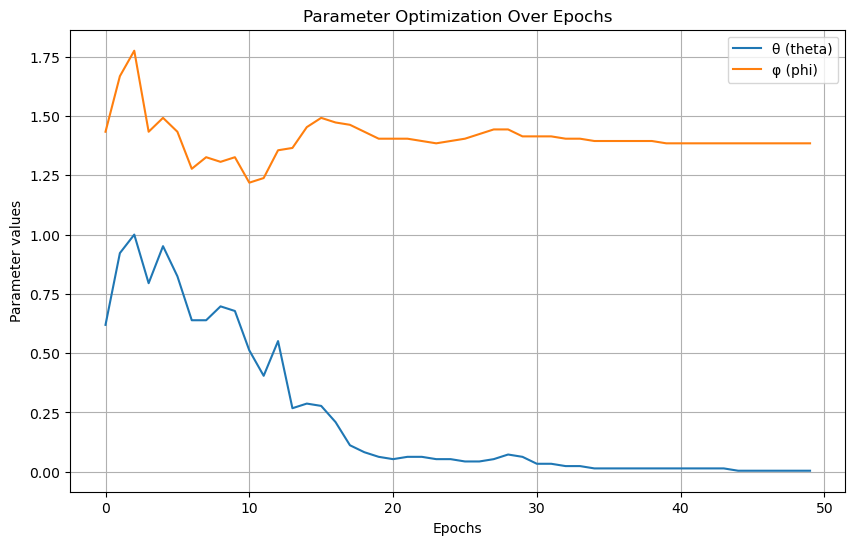

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import QasmSimulator
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create parameters
theta = Parameter('θ')
phi = Parameter('φ')

# Step 2: Define a quantum circuit with parameterized gates
qc = QuantumCircuit(1, 1)

# Apply two different rotation gates RX and RZ on qubit 0 with theta and phi as the angle parameters
qc.rx(theta, 0)
qc.rz(phi, 0)

# Measure the qubit
qc.measure(0, 0)

# Step 3: Classical optimization setup
def classical_objective(theta_val, phi_val):
    """
    Classical objective function to optimize.
    For simplicity, we aim to minimize the probability of observing '1'.
    """
    # Assign parameter values
    qc_with_values = qc.assign_parameters({theta: theta_val, phi: phi_val})

    # Simulate the circuit
    backend = QasmSimulator()
    compiled_circuit = transpile(qc_with_values, backend)  # transpile qc_with_values with the backend
    job = backend.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Calculate the probability of observing '1'
    prob_one = counts.get('1', 0) / 1024  # Get count of '1' and normalize by the number of shots
    return prob_one

# Initialize parameters
theta_values = []
phi_values = []
objective_values = []

theta_current = np.pi / 4  # Initial value for θ
phi_current = np.pi / 2    # Initial value for φ
learning_rate = 0.1
epochs = 50

# Optimization loop
for epoch in range(epochs):
    # Compute the objective
    objective = classical_objective(theta_current, phi_current)
    objective_values.append(objective)

    # Gradient approximation (finite differences)
    delta = 0.01
    grad_theta = (classical_objective(theta_current + delta, phi_current) - objective) / delta
    grad_phi = (classical_objective(theta_current, phi_current + delta) - objective) / delta

    # Update parameters using gradient descent
    theta_current = theta_current - learning_rate * grad_theta
    phi_current = phi_current - learning_rate * grad_phi

    # Store parameter values
    theta_values.append(theta_current)
    phi_values.append(phi_current)

# Step 4: Plot the values of θ and φ across epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), theta_values, label='θ (theta)')
plt.plot(range(epochs), phi_values, label='φ (phi)')
plt.xlabel('Epochs')
plt.ylabel('Parameter values')
plt.title('Parameter Optimization Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
